# Tarea 5: Procesamiento y Clasificación de Datos

- Reliza una aplicación de redes neuronales convolucionales para clasificar, segmentar o detectar objetos en imágenes.

## Alumnos: Eduardo Alan Hernandez Villasana & ALEXIS HERNANDEZ MORALES

### Matrícula: 1941416

In [1]:
# Librerias para lectura de imagenes
import cv2
import numpy as np
import glob

# Librerias para la CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
img = cv2.imread("Pajaros\8-aves.jpeg")
img = cv2.resize(img, (256, 256))

In [3]:
img.shape

(256, 256, 3)

In [4]:
cv2.imshow("imagen example", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Se abren las imágenes y se procesan

In [5]:
# Generando Dataset X y Y
label_dict = {0: "Gatos", 1:"Pajaros", 2:"Perros"}
X = []
y = []
j = 0
image_dict = {}
for i in label_dict:
    path_list = glob.glob(f"{label_dict[i]}/*")
    print (f"\n\nCargando {label_dict[i]}")
    for path in path_list:
        print(f"Cargando imagen {path}")
        image_dict[path] = j
        j +=1
        img = cv2.imread(path)
        img = cv2.resize(img, (256, 256))
        img = img/255
        X.append(img)
        y.append(i)



Cargando Gatos
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.52 (1).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.52.jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.53 (1).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.53 (2).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.53 (3).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.53 (4).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.53.jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.54 (1).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.54 (2).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.54 (3).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.54.jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.55 (1).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.55 (2).jpeg
Cargando imagen Gatos\WhatsApp Image 2024-11-18 at 10.18.55 (3).jpeg
Cargando imagen Gatos\WhatsAp

In [6]:
# Se hace categorica la variable "y" y la variable X se convierte a np.array
X = np.array(X)
y = to_categorical(y, num_classes=3)

In [7]:
y.shape, X.shape

((51, 3), (51, 256, 256, 3))

In [8]:
def print_image(path): # Funcion para imprimir imagenes
    cv2.imshow("imagen example", X[image_dict[path]])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
print_image("Pajaros\images.jfif")

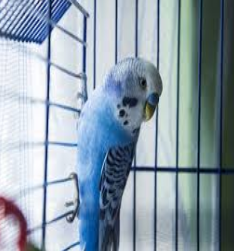


Imagen mostrada en la celda anterior

In [10]:
# Separando en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

Se diseña la Red Neuronal Convulocional

In [11]:
# Se diseña la CNN

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.6),
    Dense(3, activation='softmax')
])

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

c:\Users\alana\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - accuracy: 0.3854 - loss: 1.3182 - val_accuracy: 0.3636 - val_loss: 1.3900
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.3146 - loss: 1.3859 - val_accuracy: 0.2727 - val_loss: 1.1000
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - accuracy: 0.3312 - loss: 1.0844 - val_accuracy: 0.2727 - val_loss: 1.1990
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.3646 - loss: 1.1680 - val_accuracy: 0.3636 - val_loss: 1.0690
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.3917 - loss: 1.0594 - val_accuracy: 0.5455 - val_loss: 1.0348
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 498ms/step - accuracy: 0.6250 - loss: 0.9739 - val_accuracy: 0.5455 - val_loss: 1.0213
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 0.5875 - loss: 0.8885 - val_accuracy: 0.6364 - val_loss: 1.0442
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 0.5437 - loss: 0.8674 - val_accuracy: 0.6364 - val_loss:

In [13]:
#Evaluando el Modelo
test_loss, test_acc = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6364 - loss: 2.9308


In [14]:
test_loss, test_acc

(2.930760383605957, 0.6363636255264282)

Se tiene una presición del 63%, buena metrica considerando el tamaño de la muestra disponible y de lo variable de las fotografías

In [15]:
X[image_dict[path]]

array([[[0.88235294, 0.91764706, 0.93333333],
        [0.87843137, 0.91372549, 0.92941176],
        [0.88235294, 0.91764706, 0.93333333],
        ...,
        [0.41960784, 0.49019608, 0.51764706],
        [0.41568627, 0.48627451, 0.51372549],
        [0.40392157, 0.4745098 , 0.50196078]],

       [[0.88627451, 0.91764706, 0.93333333],
        [0.88627451, 0.92156863, 0.9372549 ],
        [0.8745098 , 0.90980392, 0.9254902 ],
        ...,
        [0.42352941, 0.49411765, 0.52156863],
        [0.42352941, 0.49411765, 0.52156863],
        [0.40784314, 0.47843137, 0.50588235]],

       [[0.8745098 , 0.90980392, 0.9254902 ],
        [0.8745098 , 0.91372549, 0.92941176],
        [0.8745098 , 0.90980392, 0.9254902 ],
        ...,
        [0.43137255, 0.50196078, 0.52941176],
        [0.41176471, 0.48235294, 0.50980392],
        [0.41568627, 0.48627451, 0.51372549]],

       ...,

       [[0.66666667, 0.70980392, 0.7254902 ],
        [0.68235294, 0.7254902 , 0.74117647],
        [0.68627451, 0

In [16]:
# Evaluando 3 ejemplos

#Ejemplo 1: Perro
path = "Perros\\WhatsApp Image 2024-11-17 at 13.53.19 (2).jpeg"
img = X[image_dict[path]]
img = np.expand_dims(img, axis = 0)
predicted = model.predict(img)
print_image(path)
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[3.9697125e-06 1.3281286e-03 9.9866796e-01]]


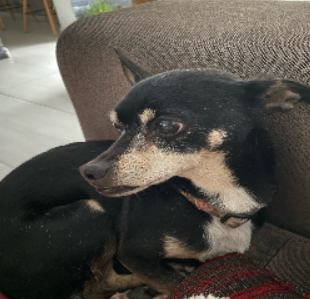

La Red Neuronal predijo un Perro

In [17]:
#Ejemplo 2: Gato
path = "Gatos\\WhatsApp Image 2024-11-18 at 10.18.56 (1).jpeg"
img = X[image_dict[path]]
img = np.expand_dims(img, axis = 0)
predicted = model.predict(img)
print_image(path)
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.8805501  0.07086257 0.04858731]]


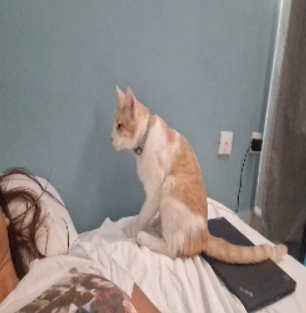

La Red neuronal Predijo un Gato

In [20]:
#Ejemplo 3: Pajaro
path = "Pajaros\\pajaros.jpg"
img = X[image_dict[path]]
img = np.expand_dims(img, axis = 0)
predicted = model.predict(img)
print_image(path)
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[1.5131832e-07 9.9964726e-01 3.5256727e-04]]


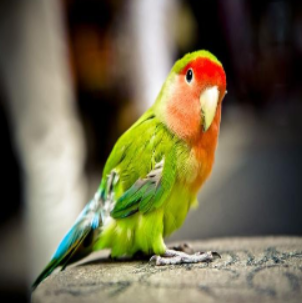

La Red Neuronal predijo un Pajaro